In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

Defaulting to user installation because normal site-packages is not writeable
    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("../../zData/Concrete/concrete.csv")

df.head()

X = df.drop("strength", axis=1)
y = df["strength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 824
Testing samples: 206


In [3]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree Regression MSE:", mse_tree)

Decision Tree Regression MSE: 42.58102330097088


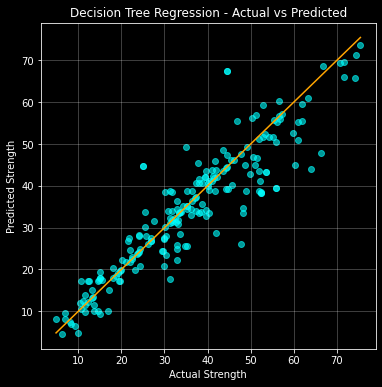

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_tree, alpha=0.6, color="cyan")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'orange')
plt.xlabel("Actual Strength", color="white")
plt.ylabel("Predicted Strength", color="white")
plt.title("Decision Tree Regression - Actual vs Predicted", color="white")
plt.grid(True, alpha=0.3)
plt.show()

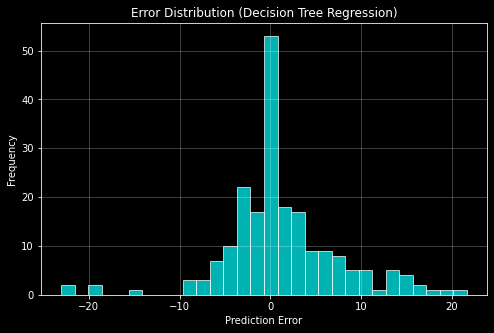

In [5]:
errors_tree = y_test - y_pred_tree

plt.figure(figsize=(8,5))
plt.hist(errors_tree, bins=30, edgecolor="white", alpha=0.7, color="cyan")
plt.xlabel("Prediction Error", color="white")
plt.ylabel("Frequency", color="white")
plt.title("Error Distribution (Decision Tree Regression)", color="white")
plt.grid(True, alpha=0.3)
plt.show()